### Instructions

##### 1-You will have a dataset
#####  2-Find the cheapest and expenses flight at a specific time
##### go throught EDA
##### 4-ML Model
##### 5-Find a sweet spot for a cheap ticket.

↪🟢  Ahmed is a customer of sastaticket.pk. He is planning to fly from Karachi to Islamabadfor his
brothers wedding and is currently in the process of choosing ticket.Ahmad has to go to Islamabad
but Ahmed also want to save some money in the process, so he chosesto wait instead of buy now,
simply because ticket price are just too hight.

↪🟢Is this the right Decision? Won't ticket prices increase in the future? Perhaps there is a sweet-spot Ahmed is hoping to find and maybe he just might find it. This is yhe problem that you will be tackling in this competition.

↪🟢 Can you predict Future Priceaccurately to such a degree that can know tell Ahmad - with confident- that he has made the wrong decision. Your task boils down to generating optimal predictions for flight prices of multiple airlines. If successful, your model will contribute greatly to Sastatickets rich and diverse set of operting Algorithms.


### 1- Exploratory Data Analysis

##### we will extract information from our data

In [1]:
#import Laibraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df_test = pd.read_csv('sastaticket_test.csv')
df_test

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2694449,2021-09-16 12:20:01.578279+00:00,x,y,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,3088556,2021-09-18 20:13:13.612131+00:00,x,y,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,3914899,2021-09-24 17:53:41.424953+00:00,x,y,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,1139859,2021-09-07 19:39:07.182848+00:00,x,y,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,594648,2021-09-05 03:48:20.099555+00:00,x,y,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1
...,...,...,...,...,...,...,...,...,...,...,...
245,2190137,2021-09-13 15:48:33.191281+00:00,x,y,2021-09-17 16:00:00+00:00,2021-09-17 18:00:00+00:00,alpha,True,15.0,1,a-23
246,2798033,2021-09-17 04:37:08.534217+00:00,x,y,2021-09-28 17:00:00+00:00,2021-09-28 18:59:00+00:00,gamma,True,20.0,1,c-6
247,371122,2021-09-03 20:39:37.508313+00:00,x,y,2021-10-19 16:00:00+00:00,2021-10-19 18:00:00+00:00,alpha,True,15.0,1,a-23
248,3549585,2021-09-22 04:45:35.128543+00:00,x,y,2021-10-04 04:00:00+00:00,2021-10-04 06:00:00+00:00,alpha,True,20.0,1,a-1


In [3]:
df_train = pd.read_csv('sastaticket_train.csv')
df_train

,Unnamed: 0,Unnamed: 0.1,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.2,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7391717,7391717,2021-05-21 13:05:51.944318+00:00,x,y,2021-06-14 05:00:00+00:00,2021-06-14 07:00:00+00:00,gamma,True,20.0,2,c-2,7391717,9025.0
4996,5243624,5243624,2021-04-22 14:21:25.998699+00:00,x,y,2021-05-18 11:00:00+00:00,2021-05-18 13:00:00+00:00,gamma,True,20.0,1,c-4,5243624,8145.0
4997,10474353,10474353,2021-06-19 16:14:22.670511+00:00,x,y,2021-07-01 14:00:00+00:00,2021-07-01 16:00:00+00:00,gamma,True,20.0,1,c-4,10474353,6620.0
4998,52905,52905,2021-01-01 20:35:13.404812+00:00,x,y,2021-01-03 11:00:00+00:00,2021-01-03 13:00:00+00:00,gamma,True,32.0,1,c-4,52905,11420.0


In [4]:
df_test.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2694449,2021-09-16 12:20:01.578279+00:00,x,y,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,3088556,2021-09-18 20:13:13.612131+00:00,x,y,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,3914899,2021-09-24 17:53:41.424953+00:00,x,y,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,1139859,2021-09-07 19:39:07.182848+00:00,x,y,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,594648,2021-09-05 03:48:20.099555+00:00,x,y,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1


In [5]:
df_train.head()

,Unnamed: 0,Unnamed: 0.1,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.2,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [6]:
df_test.shape

(250, 11)

In [7]:
df_train.shape

(5000, 14)

In [8]:
#structure
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  250 non-null    int64  
 1   f1          250 non-null    object 
 2   f2          250 non-null    object 
 3   f3          250 non-null    object 
 4   f4          250 non-null    object 
 5   f5          250 non-null    object 
 6   f6          250 non-null    object 
 7   f7          250 non-null    bool   
 8   f8          250 non-null    float64
 9   f9          250 non-null    int64  
 10  f10         250 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 19.9+ KB


In [9]:
#check null values
df_train.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
f1              0
f2              0
f3              0
f4              0
f5              0
f6              0
f7              0
f8              0
f9              0
f10             0
Unnamed: 0.2    0
target          0
dtype: int64

In [10]:
#summary stats
df_train.describe()

,Unnamed: 0,Unnamed: 0.1,f8,f9,Unnamed: 0.2,target
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.086293e+07,1.086293e+07,22.494400,0.944600,1.086293e+07,10104.351800
std,6.275456e+06,6.275456e+06,8.887101,0.607951,6.275456e+06,3359.936118
min,2.499000e+03,2.499000e+03,0.000000,0.000000,2.499000e+03,4990.000000
25%,5.417290e+06,5.417290e+06,20.000000,1.000000,5.417290e+06,7796.000000
50%,1.093803e+07,1.093803e+07,20.000000,1.000000,1.093803e+07,9403.000000
75%,1.621582e+07,1.621582e+07,32.000000,1.000000,1.621582e+07,11245.000000
max,2.177443e+07,2.177443e+07,45.000000,2.000000,2.177443e+07,33720.000000


In [11]:
print(df_train.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7',
       'f8', 'f9', 'f10', 'Unnamed: 0.2', 'target'],
      dtype='object')


In [12]:
df_train['f2'].unique()

array(['x'], dtype=object)

In [13]:
#Feature Engering
# Finding unique values in categorical lists
list = ['f2','f3','f3','f6','f8','f9','f10']

#unique values in each colums
for i in list:
    print(i,df_train[i].unique())
    print('.....................')# seprater line

f2 ['x']
.....................
f3 ['y']
.....................
f3 ['y']
.....................
f6 ['gamma' 'alpha' 'beta' 'omega']
.....................
f8 [ 0. 35. 20. 15. 32. 40. 45.]
.....................
f9 [0 1 2]
.....................
f10 ['c-2' 'a-9' 'c-4' 'a-23' 'b-1' 'a-5' 'b-9' 'a-7' 'd-1' 'c-6' 'a-1' 'd-5'
 'b-69' 'b-19' 'd-3' 'b-319' 'b-369' 'b-67' 'b-73']
.....................


In [14]:
# drop colums
df_train.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','f2','f3','f10'],axis=1, inplace=True)


In [15]:
df_train.head()

,f1,f4,f5,f6,f7,f8,f9,target
0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      5000 non-null   object 
 1   f4      5000 non-null   object 
 2   f5      5000 non-null   object 
 3   f6      5000 non-null   object 
 4   f7      5000 non-null   bool   
 5   f8      5000 non-null   float64
 6   f9      5000 non-null   int64  
 7   target  5000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 278.4+ KB


In [17]:
#convert them into date and time objects
from datetime import date, datetime
df_train['f1'] = pd.to_datetime(df_train['f1'])
df_train['f4'] = pd.to_datetime(df_train['f4'])
df_train['f5'] = pd.to_datetime(df_train['f5'])

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      5000 non-null   datetime64[ns, UTC]
 1   f4      5000 non-null   datetime64[ns, UTC]
 2   f5      5000 non-null   datetime64[ns, UTC]
 3   f6      5000 non-null   object             
 4   f7      5000 non-null   bool               
 5   f8      5000 non-null   float64            
 6   f9      5000 non-null   int64              
 7   target  5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(1), object(1)
memory usage: 278.4+ KB


In [19]:
#Adding column after subtraction
df_train.insert(0, "time_to_dep(s)",((df_train['f4']-df_train['f1']).astype('timedelta64[s]')),True)
df_train.insert(1, "travel_time(s)",((df_train['f5']-df_train['f4']).astype('timedelta64[s]')),True)


In [20]:
df_train.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
0,1268192.0,7200.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [21]:
#to check null values
df_train.isnull().sum()

time_to_dep(s)    0
travel_time(s)    0
f1                0
f4                0
f5                0
f6                0
f7                0
f8                0
f9                0
target            0
dtype: int64

In [22]:
cat_cols = ['f6','f7','f8','f9',]
num_cols = ['time_to_dep(s)','travel_time(s)']

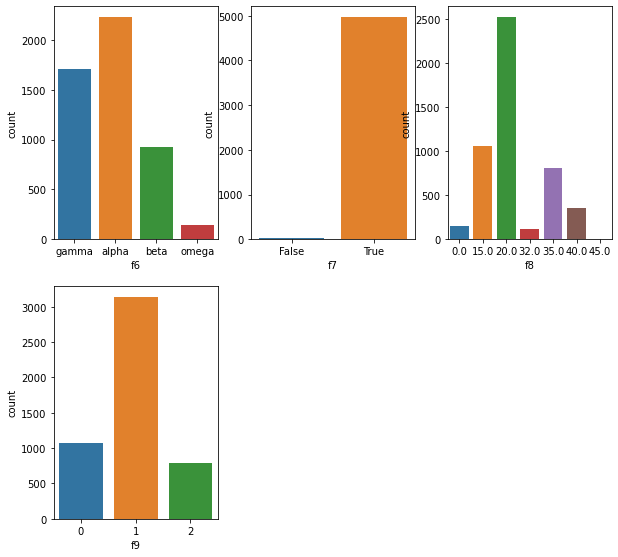

In [23]:
#plotting
c = 1
plt.figure(figsize=(10,30))
for i in cat_cols:
    plt.subplot(6,3,c)
    sns.countplot(df_train[i])
    c = c + 1
plt.show()

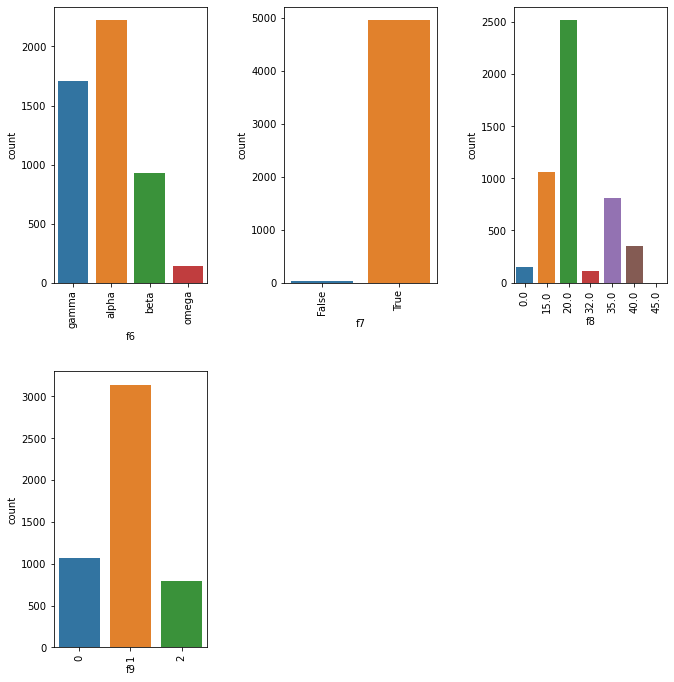

In [24]:
#plotting categorical count plot
c = 1
plt.figure(figsize=(10,30))
for i in cat_cols:
    plt.subplot(6,3,c)
    sns.countplot(df_train[i])
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=3.0)
    c = c + 1
plt.show()

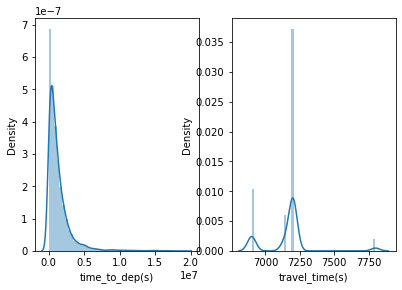

In [25]:
#plotting numerical counting plot
c = 1
plt.figure(figsize=(10,30))
for i in num_cols:
    plt.subplot(6,3,c)
    sns.distplot(df_train[i])
    c = c + 1
plt.show()

<AxesSubplot:xlabel='target', ylabel='Density'>

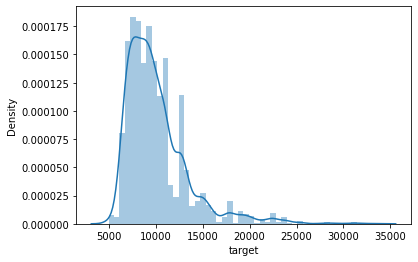

In [26]:
#target
sns.distplot(df_train.target)

<AxesSubplot:xlabel='target', ylabel='Count'>

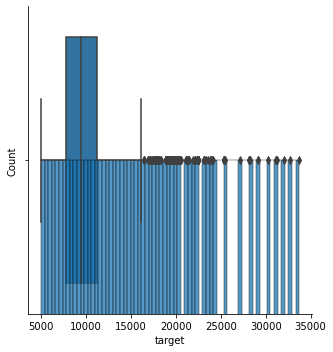

In [27]:
sns.displot(df_train['target'])
sns.boxplot(df_train.target)

<AxesSubplot:xlabel='target'>

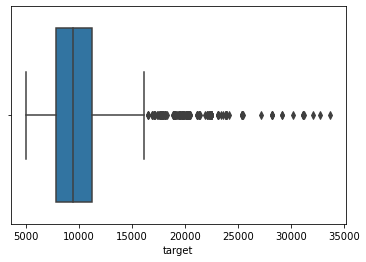

In [28]:
sns.boxplot(df_train.target)

In [29]:
#outlyer removal
#task


In [30]:
#skew anf kurtosis
df_train.skew()

time_to_dep(s)     3.703644
travel_time(s)     1.319374
f7               -11.660949
f8                 0.418300
f9                 0.027547
target             2.056345
dtype: float64

In [31]:
#skew and kurtosis
df_train.kurtosis()

time_to_dep(s)     20.796049
travel_time(s)      5.504109
f7                134.031335
f8                  0.046374
f9                 -0.310364
target              6.344666
dtype: float64

In [32]:
#Encoding of variables
df_train.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
0,1268192.0,7200.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [33]:
df_train.drop(['f1','f4','f4'], axis=1, inplace=True)
df_train.head()

,time_to_dep(s),travel_time(s),f5,f6,f7,f8,f9,target
0,1268192.0,7200.0,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [34]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [35]:
#apply label encoder
df_train['f6'] = le.fit_transform(df_train['f6'])
df_train['f7'] = le.fit_transform(df_train['f7'])
df_train['f8'] = le.fit_transform(df_train['f8'])

In [36]:
df_train.head()

,time_to_dep(s),travel_time(s),f5,f6,f7,f8,f9,target
0,1268192.0,7200.0,2021-01-23 07:00:00+00:00,2,1,0,0,7400.0
1,29688.0,7200.0,2021-07-01 15:00:00+00:00,0,1,4,1,15377.0
2,3033072.0,7200.0,2021-07-29 16:00:00+00:00,2,1,2,1,6900.0
3,363011.0,7200.0,2021-06-09 18:00:00+00:00,0,1,1,1,9707.0
4,2142368.0,6900.0,2021-08-23 06:55:00+00:00,1,1,2,0,6500.0


In [37]:
df_train.sample()

,time_to_dep(s),travel_time(s),f5,f6,f7,f8,f9,target
1327,360387.0,7200.0,2021-07-02 16:00:00+00:00,2,1,2,2,10785.0


In [38]:
df_train.describe()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.349212e+06,7159.836000,0.953400,0.992800,2.292000,0.944600,10104.351800
std,1.679384e+06,169.613345,0.948371,0.084555,1.247817,0.607951,3359.936118
min,2.003000e+03,6900.000000,0.000000,0.000000,0.000000,0.000000,4990.000000
25%,3.606870e+05,7140.000000,0.000000,1.000000,2.000000,1.000000,7796.000000
50%,8.634945e+05,7200.000000,1.000000,1.000000,2.000000,1.000000,9403.000000
75%,1.698816e+06,7200.000000,2.000000,1.000000,3.000000,1.000000,11245.000000
max,1.916464e+07,7800.000000,3.000000,1.000000,6.000000,2.000000,33720.000000


In [39]:
#sklearn function to scle our data / mormalize
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# df_train['time_todep(s)']=sc.fit_transform(df_train['time_to_dep(s)'])
# df_train['travel_time(s)']=sc.fit_transform(df_train['travel_time(s)'])
# df_train['target']=sc.fit_transform(df_train['target'])

In [40]:
df_train.columns

Index(['time_to_dep(s)', 'travel_time(s)', 'f5', 'f6', 'f7', 'f8', 'f9',
       'target'],
      dtype='object')

In [41]:
df_train['time_to_dep(s)'] = df_train['time_to_dep(s)'].values.astype(float)
df_train['travel_time(s)'] = df_train['travel_time(s)'].values.astype(float)
df_train['f5'] = df_train['f5'].values.astype(float)



In [42]:
#solitting our data into x and y
x = df_train.drop(['target'], axis=1)
y = df_train['target']

In [43]:
x.head()

,time_to_dep(s),travel_time(s),f5,f6,f7,f8,f9
0,1268192.0,7200.0,1.611385e+18,2,1,0,0
1,29688.0,7200.0,1.625152e+18,0,1,4,1
2,3033072.0,7200.0,1.627574e+18,2,1,2,1
3,363011.0,7200.0,1.623262e+18,0,1,1,1
4,2142368.0,6900.0,1.629702e+18,1,1,2,0


In [44]:
y.head()

0     7400.0
1    15377.0
2     6900.0
3     9707.0
4     6500.0
Name: target, dtype: float64

### ML Modelling

In [45]:
#Regression piplines or Algos

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#root mean squared error
#rms = mean_absolute_error(y_test, y_pred, squared = False)

In [47]:
#shorten the names
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()


In [48]:
#root mean square error
#rms = mean_absolute_error(y_test, y_pred, squared = False)

In [49]:
# lr.fit(x,y)
# lr(X_train,y_train)
# pred = lr.predict()

In [51]:
#model loop
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=3)

for i in [lr, dt, svr, knn]:  #read all model
    i.fit(X_train, y_train) #fitting our model
    pred = i.predict(X_test)  #predict
    test_score = r2_score(y_test,pred)  #test score
    train_score = r2_score(y_train, i.predict(X_train))  #train score
    if abs(train_score-test_score) <= 0.1:
        print(i)
        print('R2 score is : ',r2_score(y_test,pred))


LinearRegression()
R2 score is :  0.049260771336249176
SVR()
R2 score is :  -0.04578838034204824


In [52]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

for i in [lr, dt, svr, knn]:  #read all model
    i.fit(X_train, y_train) #fitting our model
    pred = i.predict(X_test)  #predict
    test_score = r2_score(y_test,pred)  #test score
    train_score = r2_score(y_train, i.predict(X_train))  #train score
    if abs(train_score-test_score) <= 0.1:
        print(i)
        print('R2 score is : ',r2_score(y_test,pred))
        print('Mean Absolute error is : ',mean_absolute_error(y_test,pred))
        print('Mean square error is : ',mean_squared_error(y_test,pred))
        print('RMSE is : ',mean_squared_error(y_test,pred,squared=False))
        print('--------------------------')

#To save predictions
res = pd.DataFrame(pred)
res.index = X_test.index

LinearRegression()
R2 score is :  0.04710467624219006
Mean Absolute error is :  2281.6102774502665
Mean square error is :  9974957.739167606
RMSE is :  3158.315649071132
--------------------------
SVR()
R2 score is :  -0.07186186694450103
Mean Absolute error is :  2240.5201600888086
Mean square error is :  11220305.691954615
RMSE is :  3349.6724753257017
--------------------------


In [53]:
#Final data prediction
lr = LinearRegression().fit(x,y)
pred = lr.predict(X_test)
#to save prediction
res = pd.DataFrame(pred)
res.index = X_test.index # its important for comparision
res.columns = ["prediction"]
res.to_csv("prediction_result_with_trantestsplit.csv")

In [54]:
#second method


In [55]:
# df1 = pd.read_csv('prediction_result_with_trantestsplit.csv')
# df1.head()
df1 = pd.read_csv('sastaticket_train.csv')
df1.head()

,Unnamed: 0,Unnamed: 0.1,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.2,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [56]:
date_format_str = '%Y%m/%d %H:%s,%f'

df1['f1'] = pd.to_datetime(df1['f1'])
df1['f4'] = pd.to_datetime(df1['f4'])

f1 = pd.to_datetime(df1['f1'], date_format_str)
f4 = pd.to_datetime(df1['f4'], date_format_str)
delta = f4 - f1
df1['delta'] = delta

In [57]:
delta

0      14 days 16:16:32.171272
1       0 days 08:14:48.602459
2      35 days 02:31:12.434885
3       4 days 04:50:11.344073
4      24 days 19:06:08.934694
                 ...          
4995   23 days 15:54:08.055682
4996   25 days 20:38:34.001301
4997   11 days 21:45:37.329489
4998    1 days 14:24:46.595188
4999    5 days 00:06:15.962261
Length: 5000, dtype: timedelta64[ns]

In [58]:
delta.head()

0   14 days 16:16:32.171272
1    0 days 08:14:48.602459
2   35 days 02:31:12.434885
3    4 days 04:50:11.344073
4   24 days 19:06:08.934694
dtype: timedelta64[ns]

In [59]:
#function to calculate time
def convert(second):
    seconds = second % (24 * 3600)
    hour = seconds // 3600
    seconds %=  3600
    minutes = seconds // 60
    seconds %= 60
    return "%d:%02d:%02d" % (hour , minutes, seconds)

#colum addition
df_train['time_1'] = df_train['time_to_dep(s)'].apply(convert)
df_train['time_2'] = df_train['travel_time(s)'].apply(convert)
df_train.sample(100)

,time_to_dep(s),travel_time(s),f5,f6,f7,f8,f9,target,time_1,time_2
3895,8419198.0,7200.0,1.627196e+18,2,1,2,2,9650.0,10:39:58,2:00:00
4975,40865.0,7140.0,1.614452e+18,2,1,2,2,8890.0,11:21:05,1:59:00
666,149254.0,7200.0,1.625659e+18,0,1,4,1,12645.0,17:27:34,2:00:00
3988,1187182.0,7200.0,1.625242e+18,2,1,2,1,6620.0,17:46:22,2:00:00
1320,571979.0,7200.0,1.622398e+18,0,1,4,1,14327.0,14:52:59,2:00:00
...,...,...,...,...,...,...,...,...,...,...
4643,357118.0,7200.0,1.630174e+18,0,1,2,1,12645.0,3:11:58,2:00:00
3736,1825267.0,7140.0,1.629486e+18,2,1,2,2,9750.0,3:01:07,1:59:00
4465,2337800.0,7800.0,1.614497e+18,0,1,0,0,8739.0,1:23:20,2:10:00
3624,532023.0,7200.0,1.629655e+18,0,1,2,1,25345.0,3:47:03,2:00:00


In [60]:
df_train.describe()

,time_to_dep(s),travel_time(s),f5,f6,f7,f8,f9,target
count,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.349212e+06,7159.836000,1.624313e+18,0.953400,0.992800,2.292000,0.944600,10104.351800
std,1.679384e+06,169.613345,5.774915e+15,0.948371,0.084555,1.247817,0.607951,3359.936118
min,2.003000e+03,6900.000000,1.609513e+18,0.000000,0.000000,0.000000,0.000000,4990.000000
25%,3.606870e+05,7140.000000,1.620803e+18,0.000000,1.000000,2.000000,1.000000,7796.000000
50%,8.634945e+05,7200.000000,1.625857e+18,1.000000,1.000000,2.000000,1.000000,9403.000000
75%,1.698816e+06,7200.000000,1.628600e+18,2.000000,1.000000,3.000000,1.000000,11245.000000
max,1.916464e+07,7800.000000,1.648048e+18,3.000000,1.000000,6.000000,2.000000,33720.000000


In [61]:
df_train.max()

time_to_dep(s)               19164642.0
travel_time(s)                   7800.0
f5                1648047600000000000.0
f6                                    3
f7                                    1
f8                                    6
f9                                    2
target                          33720.0
time_1                          9:59:59
time_2                          2:10:00
dtype: object